In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import _pickle as cPickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('training_data.csv')   # read in training_data.csv
data['user_id'].value_counts()   # an user can have more than one review
data['business_id'].value_counts()   # a business can have more than one review
data['text length'] = data['text'].apply(len)
data.head()
#data = data.set_index('review_id')
data

,review_id,business_id,user_id,text,date,stars,text length
0,3223,2055,2533,"Sometimes things happen, and when they do this...",2010-12-30,5,211
1,9938,4165,6371,I know Kerrie through my networking and we ben...,2011-04-26,5,426
2,7123,869,4929,Love their pizza!!!\nVery fresh. Their cannoli...,2012-09-28,5,110
3,3601,1603,2789,Being from NJ I am always on the prowl for my ...,2009-06-07,4,442
4,3948,2347,1245,We have tried this spot a few times and each v...,2011-02-20,4,332
5,8390,3789,53,This HD is very good. They seem to have knowl...,2012-05-28,4,433
6,3644,1205,2813,"I was initially going to give Riva's 3-stars, ...",2008-02-27,5,1105
7,6689,585,4484,Chino Bandido is a staple for my sister and I....,2012-05-29,5,744
8,9083,3501,5953,Food--The fire roasted garlic tomato soup is e...,2008-06-06,5,1496
9,4178,2432,1201,Fancy ladies with a few gays sprinkled in. Thi...,2011-09-01,4,222


In [9]:
test = pd.read_csv('test_data.csv')   # read in training_data.csv
test['user_id'].value_counts()   # an user can have more than one review
test['business_id'].value_counts()   # a business can have more than one review
test['text length'] = test['text'].apply(len)
test.head()
#test = test.set_index('review_id')
test

,review_id,business_id,user_id,text,date,text length
0,2713,668,2196,Ticoz is not a bad place. The menu is eclecti...,2009-01-04,335
1,4734,1014,3521,"Wow!\nBeing a Phoenix native, we have enjoyed ...",2010-10-05,1702
2,5598,2939,3028,Jodi is fantastic! Extraordinary! After too ...,2011-04-29,644
3,9545,4077,6200,T&S Glass did a wonderful job replacing my car...,2007-10-02,261
4,1471,1126,1268,My experience was on a random Saturday afterno...,2010-08-16,513
5,4533,1284,3196,I waited months before finally getting around ...,2011-12-30,629
6,7723,3598,5252,I was in Phoenix for three weeks on a business...,2011-01-25,1078
7,2433,404,1021,I work right across the street and a few of us...,2011-03-14,563
8,9182,2200,1231,I really enjoy That's A Wrap... all of the foo...,2008-06-05,413
9,2238,1555,1857,"Sadly, I have to join the crowd on this one. I...",2011-03-30,579


In [4]:
data.isnull().sum()

review_id      0
business_id    0
user_id        0
text           0
date           0
stars          0
text length    0
dtype: int64

Text(0,0.5,'Number of reviews')

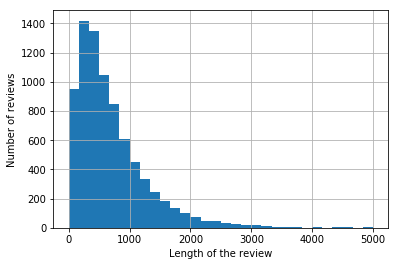

In [7]:
data.text.str.len().hist(bins=30)
plt.xlabel('Length of the review')
plt.ylabel('Number of reviews')

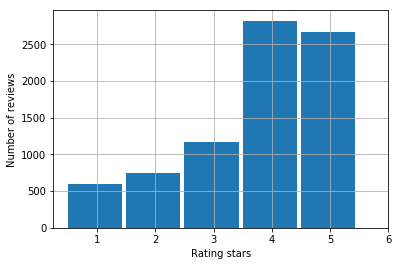

In [8]:
bins = [1, 2, 3, 4, 5, 6]
data.stars.hist(bins=bins, align='left', width=0.93)
plt.xticks(bins)
plt.xlabel('Rating stars')
plt.ylabel('Number of reviews')
plt.show()

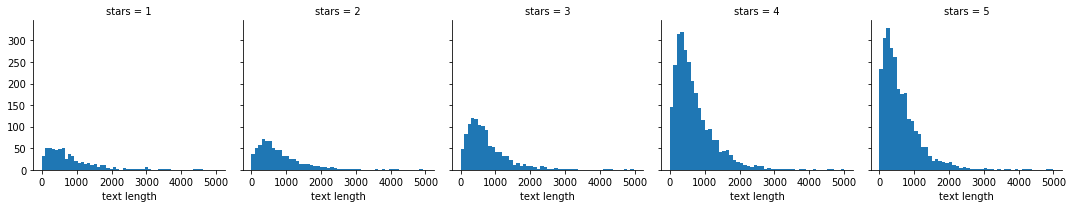

In [37]:
# Histograms of text length distributions for each star rating. 
# Notice that there is a high number of 4-star and 5-star reviews.
g = sns.FacetGrid(data = data, col = 'stars')
g.map(plt.hist, 'text length', bins = 50)

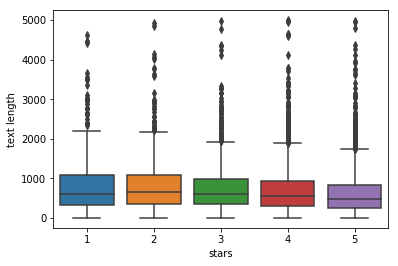

In [38]:
# Box plot of text length against star ratings.
# From the plot, looks like the 1-star and 2-star ratings have much longer text, but there are many outliers
sns.boxplot(x = 'stars', y = 'text length', data = data)

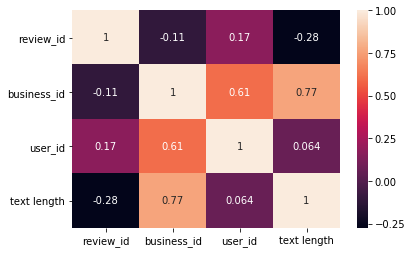

In [39]:
stars = data.groupby('stars').mean()
stars.corr()
sns.heatmap(data=stars.corr(), annot=True)

In [15]:
X = data['text']
print(len(X))  # 7997

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X)
X_vector = tfidf_vectorizer.fit_transform(X)

test_text = test['text']
print(len(test_text))  # 2003

test_feature = tfidf_vectorizer.transform(test_text)

7997
2003


In [16]:
X = X_vector
y = data["stars"]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

rfc = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 700}


In [155]:
CV_rfc.best_score_

0.44138736034684006

In [17]:
rfc1 = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 700, max_depth=8, criterion='entropy')

In [18]:
rfc1.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [21]:
pred = rfc1.predict(test_feature)

In [22]:
predict12 = pd.Series(pred).to_frame().set_index(test['review_id'])
# predict12.to_csv('predict12.csv', header=False) 0.4408

In [23]:
NBclf = MultinomialNB()
NBclf.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
pred1 = NBclf.predict(test_feature)

In [25]:
predict13 = pd.Series(pred1).to_frame().set_index(test['review_id'])
# predict13.to_csv('predict13.csv', header=False) 0.4269

In [26]:
from sklearn.linear_model import SGDClassifier
SGDclf = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
SGDclf.fit(X, y)

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [29]:
pred2 = SGDclf.predict(test_feature)

In [30]:
predict15 = pd.Series(pred2).to_frame().set_index(test['review_id'])
#predict15.to_csv('predict15.csv', header=False) 0.4928